### Problemática

Uma empresa de serviços financeiros deseja segmentar seus clientes para oferecer produtos personalizados e melhorar a satisfação do cliente. Para isso, eles precisam entender melhor os perfis dos clientes, agrupando-os em clusters com base em diferentes atributos. Os principais atributos que a empresa considera importantes para análise são:

- Idade
- Renda Anual
- Pontuação de Crédito
- Frequência de Transações (número de transações por mês)
- Saldo Médio na Conta

Com esses dados, a empresa espera identificar diferentes grupos de clientes, como jovens com alta frequência de transações e baixa renda, ou clientes mais velhos com alta renda e alta pontuação de crédito. Para realizar essa segmentação, a empresa decide usar uma rede neural SOM (Self-Organizing Map), que é adequada para descobrir padrões e agrupar dados em clusters.

In [4]:
import pandas as pd
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [7]:
df_clientes = pd.read_csv('https://raw.githubusercontent.com/efrainmpp1/Aulas_I.A/main/datasets/clientes_servicos_financeiros.csv')
df_clientes.head()

,idade,renda_anual,pontacao_crédito,frequencia_transacoes,saldo_medio_conta
0,56,145055,680,11,9378
1,69,81268,735,16,2881
2,46,112201,782,2,40567
3,32,58243,324,8,48365
4,60,77384,416,11,14675


In [8]:
# Normalização dos dados
scaler = MinMaxScaler()
dados_normalizados = scaler.fit_transform(df_clientes)

In [11]:
dados_normalizados[:5]

array([[0.74509804, 0.9620032 , 0.69216758, 0.35714286, 0.17072972],
       [1.        , 0.47107718, 0.79234973, 0.53571429, 0.03807832],
       [0.54901961, 0.70914786, 0.87795993, 0.03571429, 0.80752583],
       [0.2745098 , 0.2938691 , 0.04371585, 0.25      , 0.96674017],
       [0.82352941, 0.44118462, 0.21129326, 0.35714286, 0.27888031]])

### Treinando Rede SOM

In [12]:
# Inicializando a SOM
som_shape = (5, 5)  # Tamanho do grid da SOM
som = MiniSom(som_shape[0], som_shape[1], dados_normalizados.shape[1], sigma=0.3, learning_rate=0.5)

In [13]:
#Treinamento da SOM
som.random_weights_init(dados_normalizados)
som.train_random(dados_normalizados, 50000)

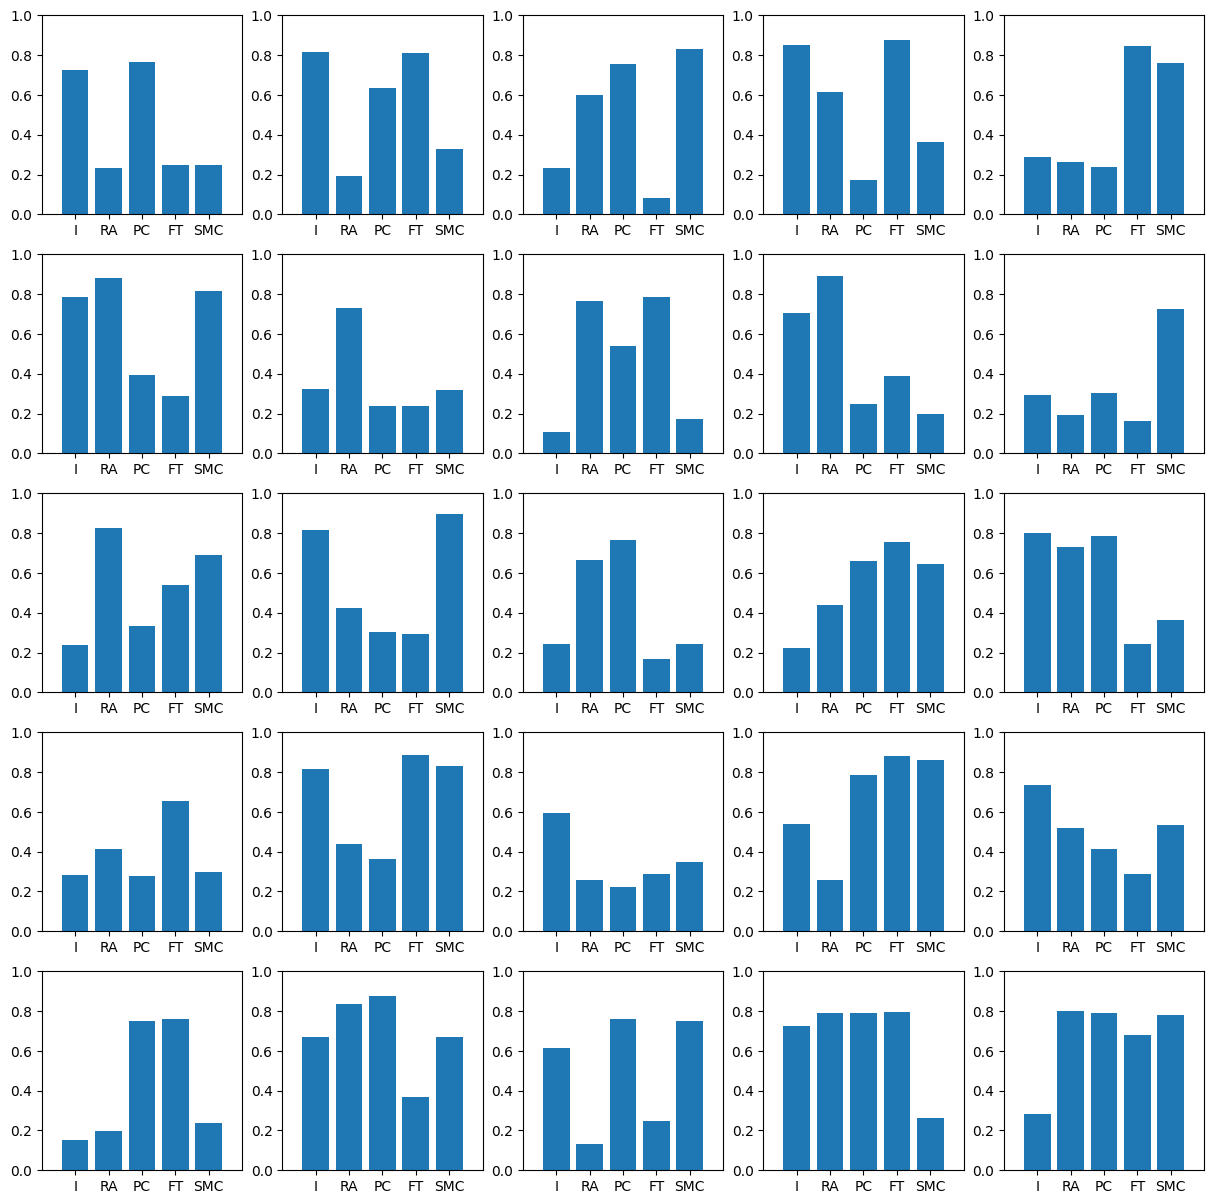

In [15]:
# Obtem o vetor de pesos da rede treinada
pesos = som.get_weights()

# Mostra todos os pesos
cont = 1;
x = ['I','RA', 'PC', 'FT', 	'SMC']
plt.figure(figsize=(15,15))
for row in pesos:
  for elem in row:
    plt.subplot(5,5,cont)
    cont=cont+1
    plt.axis([-1, 5, 0, 1])
    plt.bar(x, elem)
    
plt.show()

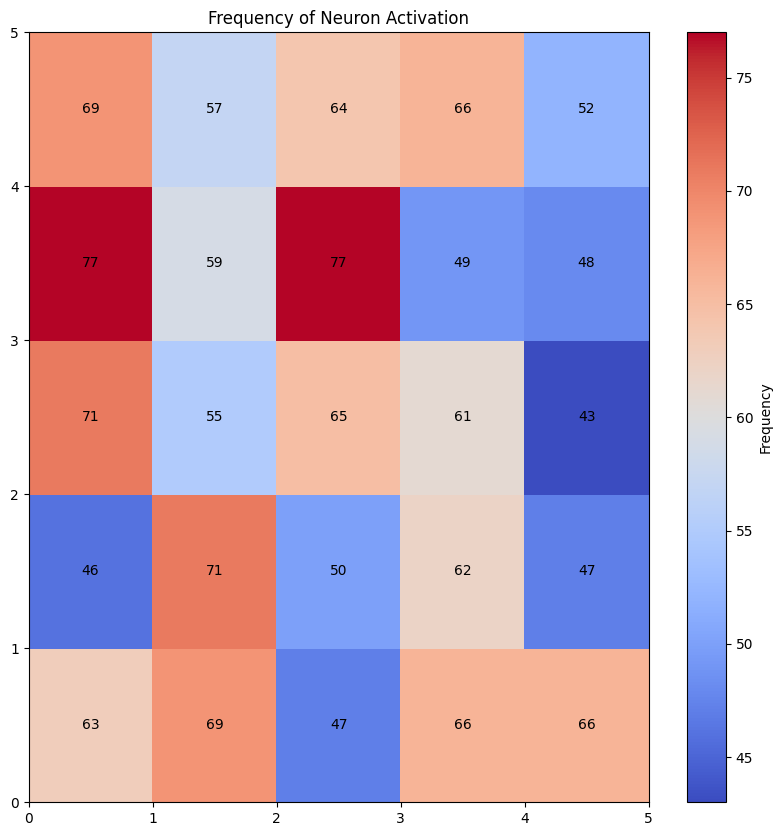

In [17]:
import numpy as np
# Criando a matriz de frequências
activation_frequency = np.zeros((som_shape[0], som_shape[1]))

# Contando a frequência de ativações para cada neurônio
for x in dados_normalizados:
    w = som.winner(x)
    activation_frequency[w[0], w[1]] += 1

# Plotando o heatmap
plt.figure(figsize=(10, 10))
plt.pcolor(activation_frequency, cmap='coolwarm')
plt.colorbar(label='Frequency')
plt.title('Frequency of Neuron Activation')

# Adicionando os números sobre as cores
for i in range(som_shape[0]):
    for j in range(som_shape[1]):
        plt.text(j + 0.5, i + 0.5, int(activation_frequency[i, j]),
                 ha='center', va='center', color='black')

plt.show()

### Interpretação
A visualização obtida do SOM ajuda a identificar padrões e agrupamentos de clientes com características semelhantes. Por exemplo:

- Clientes jovens com alta frequência de transações podem ser agrupados em um cluster específico.
- Clientes mais velhos com alta renda e alta pontuação de crédito podem formar outro cluster.

Esses insights permitem à empresa oferecer produtos financeiros personalizados e melhorar a satisfação do cliente.